In [1]:
import os
print('os')
import numpy as np
import tensorflow as tf
print('tensorflow')

import sys
print('sys')
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path

from sklearn.metrics import confusion_matrix

from config import *
from utils.util import *

from iterator import batch_iterator


os
tensorflow
sys


Using TensorFlow backend.


In [2]:
# with open(os.path.join(RESULT_PATH,"history.csv"),'w') as f:
#     f.write("epoch,loss,acc,val_loss,val_acc\n")

import pandas as pd
hist = pd.read_csv(os.path.join(RESULT_PATH,"history.csv"))

C:\Users\infinigru\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


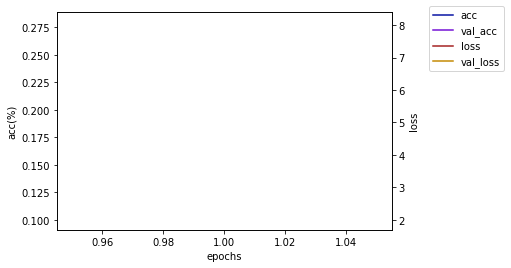

In [3]:
history_graph(hist)

In [4]:
graph = tf.get_default_graph()

In [13]:
# graph()

In [17]:
# for i in graph.get_operations():
#     if 'output' in str(i):
#         print(i.name)

In [6]:
args = TrainOption()

In [7]:
check_point_epoch = 1

In [8]:
restore_meta = os.path.join(RESULT_PATH,f"checkpoint_{check_point_epoch}.ckpt.meta")

In [9]:
with open(TEST_FILE.split('.')[0] + '.length', 'r') as f:
    test_data_lenth = int(f.read())

In [10]:
with tf.Session() as sess:    
    saver = tf.train.import_meta_graph(restore_meta)
    saver.restore(sess, tf.train.latest_checkpoint(RESULT_PATH))
    
    print(f"test data from : {TEST_FILE}")
    test_iterator = batch_iterator(TEST_FILE 
                                   , batch_size=args.BATCH_SIZE
                                   , training=False, shuffle=False)
    test_images_batch, test_labels_batch = test_iterator.get_next()
    
    sess.run(test_iterator.initializer)
    
    graph = tf.get_default_graph()
    # get tensor for feed forward
    images = graph.get_tensor_by_name('images:0')
    labels = graph.get_tensor_by_name('labels:0')
    
#     output = graph.get_tensor_by_name('dense/Softmax_1:0')
    output = graph.get_tensor_by_name('output:0')
    prediction = graph.get_tensor_by_name('accuracy/prediction:0')
    training = graph.get_tensor_by_name('training:0')
    
    predictions= []
    y_pred = []
    y_test = []
    
    print('testing ...')
    pr=progress()
    while True:
        pr.print_progress(args.BATCH_SIZE,test_data_lenth,' ')

        try:
            test_images, test_labels = sess.run([test_images_batch, test_labels_batch])
            output_, prediction_= sess.run( [output, prediction],
                                            feed_dict={images: test_images, labels: test_labels, training: False})
            predictions.append(prediction_)
            y_pred.extend(np.argmax(output_,1))
            y_test.extend(tf.argmax(labels, 1).eval(feed_dict={labels: test_labels})) #
        except tf.errors.OutOfRangeError:
            sess.run(test_iterator.initializer)
            break
#         if i> 50:
#             break
            
    sess.close()
# 출처: https://goodtogreate.tistory.com/entry/Saving-and-Restoring [GOOD to GREAT]

INFO:tensorflow:Restoring parameters from D:\Projects\gitrepo\tensorflow_project\result\checkpoint_1.ckpt
test data from : D:\Projects\gitrepo\tensorflow_project\dataset\cifar10\image\test.tfrecod


KeyError: "The name 'output:0' refers to a Tensor which does not exist. The operation, 'output', does not exist in the graph."

In [8]:
# y_pred = np.concatenate(y_pred)

In [19]:
# predictions

In [11]:
print(f"acc : {np.mean(np.concatenate(predictions))}")

acc : 0.22


In [12]:
confusion_matrix(y_pred,y_test)

array([[  0, 312, 313, ..., 313, 312, 312],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [13]:
sess.close()